<a href="https://colab.research.google.com/github/Raysk1/machineLearning/blob/main/PROYECTO_02_FRANCO_GARCIA_OSCAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTANDO LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#DESCRIBIENDO EL DATASET


In [2]:
#Cargando el dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv", sep=";")
#mostrando el dataset
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
#Mostrando informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#Mostrando el total de nulos por columna
print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#LIMPIANDO EL DATASET

In [5]:
#eliminando valores nulos
df.dropna(inplace= True)
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [6]:
#Calculando la media, mediana, maximo, minimo, etc
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#Eliminando valores que no pueden ser posibles
df.drop(df.loc[df['Quantity'] <= 0].index, inplace=True)



In [8]:
#valores unicos por colunma
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

In [9]:
#Eliminando duplicados
df.drop_duplicates(inplace=True)

#CALCULANDO EL RFM

In [10]:

#Aplicando el tipo de dato a la columna para que se pueda trabajar con las fechas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
#Calculando recency
df_recency = df.groupby(by='CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
     lambda x: (recent_date - x).days)
display(df_recency)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
4334,18280.0,2011-03-07 09:52:00,277
4335,18281.0,2011-06-12 10:53:00,180
4336,18282.0,2011-12-02 11:43:00,7
4337,18283.0,2011-12-06 12:02:00,3


In [12]:
#Calculando frequency
df_frequency = df.groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
df_frequency.columns = ['CustomerID', 'Frequency']
display(df_frequency)


,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


In [13]:
#Creando la columna Total
df['Total'] = df['Quantity']*df['UnitPrice']
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [14]:
#calculando monetary value
df_monetary = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
df_monetary.columns = ['CustomerID', 'Monetary']
display(df_monetary)

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [15]:
#Uniendo dfs
df_rfm = df_recency.merge(df_frequency, on='CustomerID')
df_rfm = df_rfm.merge(df_monetary, on='CustomerID').drop(
    columns='LastPurchaseDate')
display(df_rfm)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,721,2045.53


In [16]:
#Calculando quartiles en rango de 1 a 5
df_rfm['r_quartile'] = pd.qcut(df_rfm['Recency'], 5, ['5','4','3','2','1'])
df_rfm['f_quartile'] = pd.qcut(df_rfm['Frequency'], 5, ['1','2','3','4','5'])
df_rfm['m_quartile'] = pd.qcut(df_rfm['Monetary'], 5, ['1','2','3','4','5'])
display(df_rfm)

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,1,182,4310.00,5,5,5
2,12348.0,74,31,1797.24,2,3,4
3,12349.0,18,73,1757.55,4,4,4
4,12350.0,309,17,334.40,1,2,2
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,1,1,1
4335,18281.0,180,7,80.82,1,1,1
4336,18282.0,7,12,178.05,5,1,1
4337,18283.0,3,721,2045.53,5,5,4


In [17]:
#Calculando RFM Score
df_rfm['RFM_Score'] = df_rfm.r_quartile.astype(str)+ df_rfm.f_quartile.astype(str) + df_rfm.m_quartile.astype(str)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,182,4310.00,5,5,5,555
2,12348.0,74,31,1797.24,2,3,4,234
3,12349.0,18,73,1757.55,4,4,4,444
4,12350.0,309,17,334.40,1,2,2,122


In [18]:
#Mostrando a los clientes TOP
df_rfm[df_rfm['RFM_Score']=='555'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
1690,14646.0,1,2080,280206.02,5,5,5,555
4202,18102.0,0,431,259657.30,5,5,5,555
3729,17450.0,7,336,194390.79,5,5,5,555
1880,14911.0,0,5672,143711.17,5,5,5,555
1334,14156.0,9,1395,117210.08,5,5,5,555


#Creando el modelo

In [19]:
#Tomando los datos necesarios
df1 = df_rfm.drop(['r_quartile' , 'f_quartile', 'm_quartile', 'RFM_Score','CustomerID'], axis= 1)
display(df1)

,Recency,Frequency,Monetary
0,325,1,77183.60
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40
...,...,...,...
4334,277,10,180.60
4335,180,7,80.82
4336,7,12,178.05
4337,3,721,2045.53


In [20]:
#Normalizando los datos
scaled_data = StandardScaler().fit_transform(df1)
scaled_data

array([[ 2.33485829e+00, -3.96968210e-01,  8.36397668e+00],
       [-9.05199314e-01,  4.05730491e-01,  2.51778965e-01],
       [-1.75186336e-01, -2.63924227e-01, -2.79383250e-02],
       ...,
       [-8.45198247e-01, -3.48185416e-01, -2.08184524e-01],
       [-8.85198958e-01,  2.79608740e+00, -2.98993684e-04],
       [-4.95192025e-01, -9.09670479e-02, -2.34811224e-02]])

In [21]:
#Convirtiendo los datos a un dataframe
scaled_data = pd.DataFrame(scaled_data, columns =df1.columns, index = df1.index)
scaled_data

,Recency,Frequency,Monetary
0,2.334858,-0.396968,8.363977
1,-0.905199,0.405730,0.251779
2,-0.175186,-0.263924,-0.027938
3,-0.735196,-0.077663,-0.032357
4,2.174855,-0.326011,-0.190780
...,...,...,...
4334,1.854850,-0.357055,-0.207901
4335,0.884833,-0.370359,-0.219008
4336,-0.845198,-0.348185,-0.208185
4337,-0.885199,2.796087,-0.000299


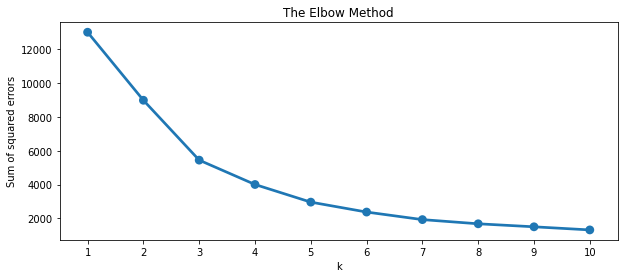

In [28]:

#Usando the Elbow Method para saber la cantidad optima de clusters
sse = {}
#entrenando KMeans y calculando el SSE para cada k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    #asignando la suma de las distancias cuadradas para cada elemento k del diccionario
    sse[k] = kmeans.inertia_
    
# graficando The Elbow Method
plt.figure(figsize=(10,4))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [29]:
#Creando y entrenando el modelo
#Gracias a la grafica de the elbow method se llega a la conclusion de que el numero de clusters optimos es 5
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0, n_init = 15).fit(scaled_data)

In [30]:
#haciendo las predicciones
df_rfm['segment'] = model.predict(scaled_data)
df_rfm

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,segment
0,12346.0,325,1,77183.60,1,1,5,115,4
1,12347.0,1,182,4310.00,5,5,5,555,1
2,12348.0,74,31,1797.24,2,3,4,234,1
3,12349.0,18,73,1757.55,4,4,4,444,1
4,12350.0,309,17,334.40,1,2,2,122,0
...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,1,1,1,111,0
4335,18281.0,180,7,80.82,1,1,1,111,0
4336,18282.0,7,12,178.05,5,1,1,511,1
4337,18283.0,3,721,2045.53,5,5,4,554,4
